In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pylab
import timeit
start = timeit.default_timer()
def kmers(read, k):
    KList=[]
    num_kmers = len(read) - k + 1
    for i in range(num_kmers):
        kmer = read[i:i+k]
        if i==0:
            KList.append(kmer)
        else:
            KList.append(kmer)    
#   the below code sorts the kmer list
    for i in range(len(KList) - 1):
        for j in range(i + 1, len(KList)):
            if KList[i] > KList[j]:
                temp = KList[i]
                KList[i] = KList[j]
                KList[j] = temp 
    return KList

# input the String to be reconstructed
# input k
input1="ACCCCCACGGGAAACAGCAG"
a=kmers(input1,5)

print(f"Kmers={a}")
print(" ")


def KmerListOfNodes(ls):
    ListOfNodes=[]
    for current in ls: 
        for i in range(len(ls)):
            temp = ls[i]
            if current[1:len(current)]==temp[0:len(temp)-1]:
                ListOfNodes.append((current,temp))
    return ListOfNodes

print(f"edges = {KmerListOfNodes(a)}")

Kmers=['AAACA', 'AACAG', 'ACAGC', 'ACCCC', 'ACGGG', 'AGCAG', 'CACGG', 'CAGCA', 'CCACG', 'CCCAC', 'CCCCA', 'CCCCC', 'CGGGA', 'GAAAC', 'GGAAA', 'GGGAA']
 
edges = [('AAACA', 'AACAG'), ('AACAG', 'ACAGC'), ('ACAGC', 'CAGCA'), ('ACCCC', 'CCCCA'), ('ACCCC', 'CCCCC'), ('ACGGG', 'CGGGA'), ('CACGG', 'ACGGG'), ('CAGCA', 'AGCAG'), ('CCACG', 'CACGG'), ('CCCAC', 'CCACG'), ('CCCCA', 'CCCAC'), ('CCCCC', 'CCCCA'), ('CCCCC', 'CCCCC'), ('CGGGA', 'GGGAA'), ('GAAAC', 'AAACA'), ('GGAAA', 'GAAAC'), ('GGGAA', 'GGAAA')]


nodes = ['AAACA', 'AACAG', 'ACAGC', 'CAGCA', 'ACCCC', 'CCCCA', 'CCCCC', 'ACGGG', 'CGGGA', 'CACGG', 'AGCAG', 'CCACG', 'CCCAC', 'GGGAA', 'GAAAC', 'GGAAA']
 
edges = [('AAACA', 'AACAG'), ('AACAG', 'ACAGC'), ('ACAGC', 'CAGCA'), ('CAGCA', 'AGCAG'), ('ACCCC', 'CCCCA'), ('ACCCC', 'CCCCC'), ('CCCCA', 'CCCAC'), ('CCCCC', 'CCCCA'), ('CCCCC', 'CCCCC'), ('ACGGG', 'CGGGA'), ('CGGGA', 'GGGAA'), ('CACGG', 'ACGGG'), ('CCACG', 'CACGG'), ('CCCAC', 'CCACG'), ('GGGAA', 'GGAAA'), ('GAAAC', 'AAACA'), ('GGAAA', 'GAAAC')]


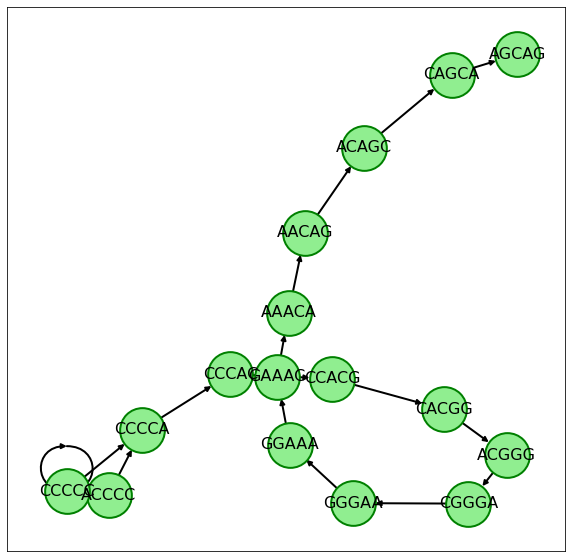

In [2]:
# for diplaying the graph
G = nx.DiGraph()
G.add_edges_from(KmerListOfNodes(a),length=15)
totalNodes=G.nodes()
pos = nx.spring_layout(G)
options = {
    "font_size": 16,
    "node_size": 2000,
    "node_color": "lightgreen",
    "edgecolors": "green",
    "linewidths": 2,
    "width": 2,
    "edge_vmin":5
}
nodes=G.nodes()
edges=G.edges()
print(f"nodes = {nodes()}")
print(" ")
print(f"edges = {edges}")


plt.figure(2,figsize=(10,10))
nx.draw_networkx(G,pos,**options)
plt.show()

In [3]:
# assigning numerical values to the kmers
# so that adjacency matrix can be made
edge1=list(edges)
node1=list(nodes)
# print(node1)
# print(edge1)
DictNode = {}
print(DictNode)
count=0
for i in node1:
    DictNode.update({i:count})
    count+=1
print(DictNode)


def replaceKey(dict, key):   
    if key in dict.keys():
        return dict[key]
        
edgeAlternate = [[0,0] for i in range(len(edge1))]

for i in range(len(edge1)):
    edgeAlternate[i][0]=replaceKey(DictNode,edge1[i][0])
    edgeAlternate[i][1]=replaceKey(DictNode,edge1[i][1])

print(edgeAlternate)

{}
{'AAACA': 0, 'AACAG': 1, 'ACAGC': 2, 'CAGCA': 3, 'ACCCC': 4, 'CCCCA': 5, 'CCCCC': 6, 'ACGGG': 7, 'CGGGA': 8, 'CACGG': 9, 'AGCAG': 10, 'CCACG': 11, 'CCCAC': 12, 'GGGAA': 13, 'GAAAC': 14, 'GGAAA': 15}
[[0, 1], [1, 2], [2, 3], [3, 10], [4, 5], [4, 6], [5, 12], [6, 5], [6, 6], [7, 8], [8, 13], [9, 7], [11, 9], [12, 11], [13, 15], [14, 0], [15, 14]]


In [4]:
possibleOutcomes=[]
class Graph: 
    # Constructor
    def __init__(self, edges, n):
        
        self.adjList = [[] for _ in range(n)]
 
        for (src, dest) in edges:
            self.adjList[src].append(dest)
            self.adjList[dest].append(src)
 
def hamiltonianPaths(graph, v, visited, path, n):
 
    if len(path) == n:
        # print the Hamiltonian path
        print(path)
        new = path
        # I have no idea why I put 2 lines below, it works DONT TOUCH!!
        # got it with trial and error
        for _ in range(n-1):
            new.append("hi")    
        possibleOutcomes.append(new)
        return 
 
    # Check if every edge starting from vertex `v` leads to a solution or not
    for w in graph.adjList[v]:
 
        # process only unvisited vertices as the Hamiltonian
        # path visit each vertex exactly once
        if not visited[w]:
            visited[w] = True
            path.append(w)
 
            # check if adding vertex `w` to the path leads to the solution or not
            hamiltonianPaths(graph, w, visited, path, n)
 
            # backtrack
            visited[w] = False
            path.pop()
 
 
def findHamiltonianPaths(graph, n):
 
    # start with every node
    for start in range(n):
 
        # add starting node to the path
        path = [start]
    
        # mark the start node as visited
        visited = [False] * n
        visited[start] = True
    
        hamiltonianPaths(graph, start, visited, path, n)
 
 
if __name__ == '__main__':
    edges = edgeAlternate
    print(edges)
    n = len(nodes)
    graph = Graph(edges, n)
    findHamiltonianPaths(graph, n)

[[0, 1], [1, 2], [2, 3], [3, 10], [4, 5], [4, 6], [5, 12], [6, 5], [6, 6], [7, 8], [8, 13], [9, 7], [11, 9], [12, 11], [13, 15], [14, 0], [15, 14]]
[4, 6, 5, 12, 11, 9, 7, 8, 13, 15, 14, 0, 1, 2, 3, 10]
[6, 4, 5, 12, 11, 9, 7, 8, 13, 15, 14, 0, 1, 2, 3, 10]
[10, 3, 2, 1, 0, 14, 15, 13, 8, 7, 9, 11, 12, 5, 4, 6]


In [5]:
# cconvertring numerical values back to Kmers
new_dict = {value:key for (key,value) in DictNode.items()}
replaceKey(new_dict,0)

final = [[0 for _ in range(len(possibleOutcomes[0]))] for k in range(len(possibleOutcomes))]

for i in range(len(possibleOutcomes)):
    for j in range(len(possibleOutcomes[0])):
        final[i][j]=replaceKey(new_dict,possibleOutcomes[i][j])
        
print("All possible hamiltonian paths in the graph = ")
print(final)

def FindHamiltonianString(ListofLists):
    Hamiltonian_String=[]
    for subList in ListofLists:
        m=subList[0]
        n=subList[1]
        i=0
        if m[1:]==n[:-1]:
            
            while i<len(subList)-2:
                m=subList[i+1]
                n=subList[i+2]
                if m[1:]==n[:-1]:  
                    i+=1
                else:
                    break
            if i+2 == len(subList):
                Hamiltonian_String.append(subList)
           
            
    return Hamiltonian_String

    
required=FindHamiltonianString(final)
print(" ")
print("Succesful Hamiltonian Paths = ")
print(required)

# reconstructing the successful hamiltonian path
def reconstruct(List):
    j=0
    newString=""
    for i in range(len(List)):
        if len(List)-1==i:
            new1=List[j]
            newString=newString+new1
            j+=1
        else:
            new1=List[j]
            newString=newString+new1[0:1]
            j+=1
    return newString

print()
for i in required:
    print(f"Reconstructed String = {reconstruct(i)}")

All possible hamiltonian paths in the graph = 
[['ACCCC', 'CCCCC', 'CCCCA', 'CCCAC', 'CCACG', 'CACGG', 'ACGGG', 'CGGGA', 'GGGAA', 'GGAAA', 'GAAAC', 'AAACA', 'AACAG', 'ACAGC', 'CAGCA', 'AGCAG'], ['CCCCC', 'ACCCC', 'CCCCA', 'CCCAC', 'CCACG', 'CACGG', 'ACGGG', 'CGGGA', 'GGGAA', 'GGAAA', 'GAAAC', 'AAACA', 'AACAG', 'ACAGC', 'CAGCA', 'AGCAG'], ['AGCAG', 'CAGCA', 'ACAGC', 'AACAG', 'AAACA', 'GAAAC', 'GGAAA', 'GGGAA', 'CGGGA', 'ACGGG', 'CACGG', 'CCACG', 'CCCAC', 'CCCCA', 'ACCCC', 'CCCCC']]
 
Succesful Hamiltonian Paths = 
[['ACCCC', 'CCCCC', 'CCCCA', 'CCCAC', 'CCACG', 'CACGG', 'ACGGG', 'CGGGA', 'GGGAA', 'GGAAA', 'GAAAC', 'AAACA', 'AACAG', 'ACAGC', 'CAGCA', 'AGCAG']]

Reconstructed String = ACCCCCACGGGAAACAGCAG


nodes = ['ACCCC', 'CCCCC', 'CCCCA', 'CCCAC', 'CCACG', 'CACGG', 'ACGGG', 'CGGGA', 'GGGAA', 'GGAAA', 'GAAAC', 'AAACA', 'AACAG', 'ACAGC', 'CAGCA', 'AGCAG']
 
edges = [('ACCCC', 'CCCCC'), ('ACCCC', 'CCCCA'), ('CCCCC', 'CCCCC'), ('CCCCC', 'CCCCA'), ('CCCCA', 'CCCAC'), ('CCCAC', 'CCACG'), ('CCACG', 'CACGG'), ('CACGG', 'ACGGG'), ('ACGGG', 'CGGGA'), ('CGGGA', 'GGGAA'), ('GGGAA', 'GGAAA'), ('GGAAA', 'GAAAC'), ('GAAAC', 'AAACA'), ('AAACA', 'AACAG'), ('AACAG', 'ACAGC'), ('ACAGC', 'CAGCA'), ('CAGCA', 'AGCAG')]


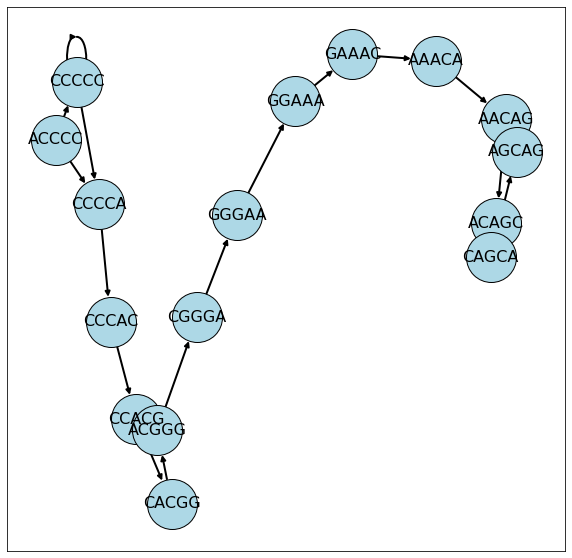


  Original String   = ACCCCCACGGGAAACAGCAG

Reconstructed String = ACCCCCACGGGAAACAGCAG


In [6]:
# diplaying the hamiltonian path

G1 = nx.DiGraph()
G1.add_edges_from(KmerListOfNodes(required[0]),length=15)

totalNodes=G1.nodes()
pos = nx.spring_layout(G1)
options = {
    "font_size": 16,
    "node_size": 2500,
    "node_color": "lightblue",
    "edgecolors": "black",
    "linewidths": 1,
    "width": 2,
    "edge_vmin":5
}

nodes=G1.nodes()
edges=G1.edges()
print(f"nodes = {nodes()}")
print(" ")
print(f"edges = {edges}")

plt.figure(1,figsize=(10,10))
nx.draw_networkx(G1,pos,**options)
plt.show()

print()
print(f"  Original String   = {input1}")
print()
for i in required:
    print(f"Reconstructed String = {reconstruct(i)}")

In [7]:
print(f"Number of reconstructed Strings = {len(required)}")
stop = timeit.default_timer()
print('Run Time: ', stop - start)

Number of reconstructed Strings = 1
Run Time:  0.42268537500000036
